NLP Cleaning 

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
print text1

## Basic Analysis on Text: Concordance

In [ ]:
text1.concordance('sea')

In [ ]:
text3.concordance('sea')

## Basic Analysis of Text: Similar & Common Context

In [ ]:
text1.similar('sea')

In [ ]:
text3.similar('sea')

In [ ]:
text1.common_contexts(['sea','whale'])

## Dispersion of Words

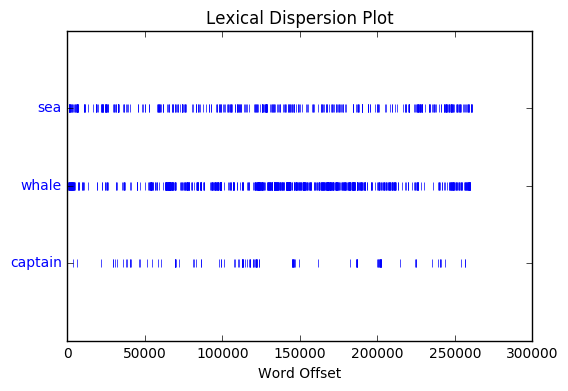

In [4]:
text1.dispersion_plot(['sea','whale','captain'])

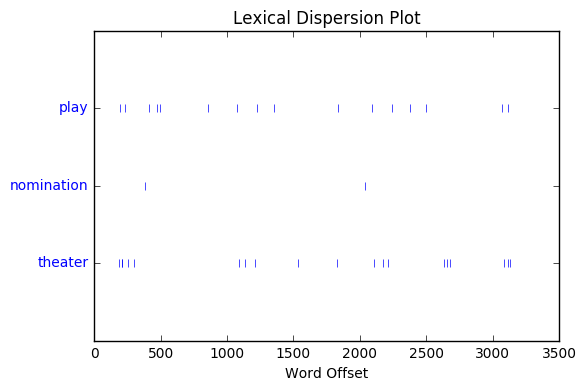

In [9]:
import nltk

#Read the datasets
path = 'C:\\tmp\\'
filePrefix = 'training_'
categories=['ARTS','SPORTS']
dataset={}
dataset_raw = {}

N={} # Number of articles in each corpus

for category in categories:
    fileName=path+filePrefix+category.lower()
    f=open(fileName,'r')
    text = ''
    text_raw = ''    
    lines=f.readlines()
    dataset_raw[category] = list(map(lambda line: line.lower(), lines))
    
    for line in lines:
        text+=line.replace('\n',' ').lower()
        text_raw = line.lower()
    f.close
    N[category]=len(lines)
    
    tokens = nltk.word_tokenize(text)
    dataset[category] = nltk.Text(tokens)

dataset['ARTS'].dispersion_plot(['play','nomination','theater'])

## Tokenization

In [10]:
from nltk.tokenize import word_tokenize
text ='Harvey Araton On Pro Basketball column suggests New York Knicks must be careful not to overuse rookie forward Kristaps Porzingis; warns playing Porzingis too often could lead to injury that would be far more devastating for team than failure to secure postseason berth.'
tokens = word_tokenize(text.lower())
print tokens

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
text = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tokens = tknzr.tokenize(text.lower())
print tokens

from nltk.tokenize import MWETokenizer
text ='Harvey Araton On Pro Basketball column suggests New York Knicks must be careful not to overuse rookie forward Kristaps Porzingis; warns playing Porzingis too often could lead to injury that would be far more devastating for team than failure to secure postseason berth.'
tokenizer = MWETokenizer([('harvey','araton'),('pro','basketball'),('new','york','knicks'),('new','york')])
tokens = tokenizer.tokenize(text.lower().split())
print tokens

['harvey', 'araton', 'on', 'pro', 'basketball', 'column', 'suggests', 'new', 'york', 'knicks', 'must', 'be', 'careful', 'not', 'to', 'overuse', 'rookie', 'forward', 'kristaps', 'porzingis', ';', 'warns', 'playing', 'porzingis', 'too', 'often', 'could', 'lead', 'to', 'injury', 'that', 'would', 'be', 'far', 'more', 'devastating', 'for', 'team', 'than', 'failure', 'to', 'secure', 'postseason', 'berth', '.']
[u'this', u'is', u'a', u'cooool', u'#dummysmiley', u':', u':-)', u':-p', u'<3', u'and', u'some', u'arrows', u'<', u'>', u'->', u'<--']
['harvey_araton', 'on', 'pro_basketball', 'column', 'suggests', 'new_york_knicks', 'must', 'be', 'careful', 'not', 'to', 'overuse', 'rookie', 'forward', 'kristaps', 'porzingis;', 'warns', 'playing', 'porzingis', 'too', 'often', 'could', 'lead', 'to', 'injury', 'that', 'would', 'be', 'far', 'more', 'devastating', 'for', 'team', 'than', 'failure', 'to', 'secure', 'postseason', 'berth.']


## The Vocabulary (or Dictionary) of Your Text

In [11]:
vocabulary={}
for category in categories:
    vocabulary[category]=sorted(set(dataset[category]))
    print 'vocabulary for %s = [%s]' % (category,vocabulary[category])

vocabulary for ARTS = [['!', '$', '&', "'", "'s", ',', '--', '.', '13-year', '16-month', '17th', '18th-century', '1936', '1940', '1952.', '1978', '1990s', '1991', '2', '20', '2007', '2008', '2009', '2010', '2013.', '2014', '2015', '2015.', '2017', '20th', '20th-century', '24', '259', '25th', '2666', '29', '30-year-plus', '33rd', '4', '50th', '59e59', '6', '900-page', ':', ';', 'a', 'abc', 'abingdon', 'about', 'academy', 'access', 'acclaimed', 'accompanying', 'acting', 'action', 'actor', 'actors', 'actress', 'actresses', 'acts', 'adam', 'adaptation', 'adapts', 'affair', 'afflicted', 'after', 'ahead', 'aims', 'akerman', 'alan', 'album', 'albums', 'alive', 'all-women', 'along', 'already', 'also', 'amanfu', 'amazon', 'ambiguity', 'ambitious', 'amc', 'america', 'american', 'americans', 'among', 'amy', 'an', 'anchor', 'and', 'anderson', 'angel', 'angeles', 'angie', 'aniello', 'animated', 'animation', 'anime', 'annie', 'anniversary', 'announces', 'annual', 'anthony', 'any', 'apart', 'apparatu

## Text & vocabulary sizes: Lexical Diversity

In [12]:
print '"ARTS" articles have a total of %s tokens and a vocabulary size of %s' % (len(dataset['ARTS']), len(vocabulary['ARTS']))
print '"SPORTS" articles have a total of %s tokens and a vocabulary size of %s' % (len(dataset['SPORTS']), len(vocabulary['SPORTS']))

print 

def lexical_diversity(text):
    return len(text)*1.0/len(set(text))

lexDiversity = {}
for category in categories:
    lexDiversity[category] = lexical_diversity(dataset[category])
    print 'Lexical Diversity in %s = %s' % (category,lexDiversity[category])

"ARTS" articles have a total of 3286 tokens and a vocabulary size of 1453
"SPORTS" articles have a total of 2936 tokens and a vocabulary size of 1151

Lexical Diversity in ARTS = 2.26152787337
Lexical Diversity in SPORTS = 2.55082536924


## Counting Words

In [13]:
print '# time "play" is used in "ARTS" %s' % dataset['ARTS'].count('play')
print '# time "play" is used in "SPORTS" %s' % dataset['SPORTS'].count('play')

# time "play" is used in "ARTS" 16
# time "play" is used in "SPORTS" 2


In [14]:
count = {}
for token in vocabulary['ARTS']:
    count[token]=dataset['ARTS'].count(token)

for w in sorted(count, key=count.get, reverse=True):
    print w, count[w]


, 156
of 116
and 98
. 95
in 66
to 42
the 40
; 37
's 32
is 30
by 28
who 28
with 26
his 25
for 23
at 21
film 21
theater 19
from 18
play 16
which 16
new 15
that 15
her 15
has 14
on 14
will 14
latest 13
series 12
director 12
discusses 12
as 12
production 11
actor 11
show 11
movie 11
work 10
musical 10
actress 10
their 10
interview 9
a 9
are 9
music 8
starring 8
company 8
he 8
playwright 7
singer 7
several 7
was 7
be 7
album 7
television 7
dance 7
broadway 7
american 7
york 7
snapshot 7
revival 6
character 6
role 6
group 6
season 6
or 6
its 6
into 6
upcoming 6
comedy 6
jon 6
museum 6
four 5
movies 5
feature 5
how 5
roles 5
been 5
life 5
it 5
oscar 5
says 5
reviews 5
open 5
city 5
excerpts 5
stephen 5
more 5
! 5
brooklyn 5
performances 5
both 5
big 5
about 5
profile 5
david 5
j 5
other 5
orchestra 4
after 4
songwriter 4
modern 4
ballet 4
brown 4
live 4
films 4
explores 4
years 4
discuss 4
one 4
artist 4
pop 4
former 4
being 4
audience 4
richard 4
inspired 4
experience 4
short 4
story 4
durin

In [15]:
count = {}
for token in vocabulary['SPORTS']:
    count[token]=dataset['SPORTS'].count(token)

for w in sorted(count, key=count.get, reverse=True):
    print w, count[w]

, 146
. 89
; 73
in 66
of 63
to 51
and 50
new 36
other 28
for 28
's 28
noted 26
york 24
on 24
coach 21
that 21
his 20
is 20
column 20
team 19
roundup 19
defeat 18
nfl 17
by 17
basketball 16
game 15
who 14
scores 14
football 14
news 13
has 13
as 12
nba 11
hockey 11
sports 11
tennis 11
will 10
the 10
games 10
at 10
first 9
pro 9
their 9
beat 9
with 9
notes 8
win 8
times 8
season 8
knicks 8
be 8
he 8
former 7
quarterback 7
playoff 7
state 7
one 7
which 7
college 7
cleveland 7
world 7
cavaliers 6
baseball 6
would 6
defeats 6
over 6
nets 6
nhl 6
teams 6
star 6
open 6
tom 6
brooklyn 6
giants 6
have 6
field 6
young 5
round 5
two 5
australian 5
tournament 5
holds 5
after 5
mike 5
wild-card 5
since 5
san 5
head 5
dallas 5
year 5
coughlin 5
players 5
played 5
bowl 5
not 5
home 5
philadelphia 5
washington 5
from 5
but 5
championship 5
manager 4
says 4
while 4
suggests 4
golden 4
afc 4
st 4
denver 4
could 4
major 4
forward 4
piazza 4
was 4
warriors 4
made 4
c 4
league 4
louis 4
griffey 4
broncos 4


## Frequency Distribution

In [16]:
def get_most_frequent(freq, n):
    result = {}
    index = 0
    for w in sorted(freq, key=freq.get, reverse=True):
        index+=1
        result[w] = freq[w]
        if index==n: 
            break
    return result

artsFD=FreqDist(dataset['ARTS'])
sportsFD=FreqDist(dataset['SPORTS'])

#Top 10 most frequent terms in ARTS and SPORTS
arts10 = get_most_frequent(artsFD,10)
sports10 = get_most_frequent(sportsFD,10)

print arts10
print sports10

{'and': 98, "'s": 32, 'of': 116, 'is': 30, ',': 156, '.': 95, 'to': 42, 'in': 66, 'the': 40, ';': 37}
{'and': 50, "'s": 28, 'for': 28, 'of': 63, ',': 146, '.': 89, 'to': 51, 'in': 66, 'new': 36, ';': 73}


## Finding Important Words

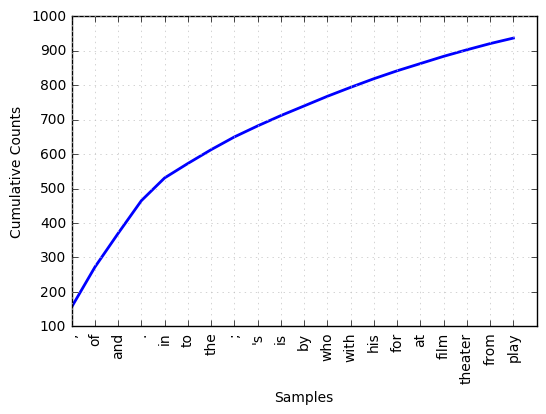

In [17]:
artsFD.plot(20, cumulative=True)

In [18]:
print len(artsFD.hapaxes())
artsFD.hapaxes()

1085


['limited',
 'bad-boy',
 'dynamic',
 'controversial',
 'hanging',
 'encores',
 'gillespie',
 'relationships',
 'originality',
 'under',
 'onstage',
 'void',
 'school',
 'harrower',
 'conceive',
 'reinvent',
 'typified',
 'triumph',
 'japanese',
 'surrounding',
 'likely',
 'street',
 'asif',
 'establishes',
 'ever',
 'seeks',
 'mee',
 'reporter',
 'rossdale',
 'point-of-view',
 'represented',
 'path',
 'ice-t',
 'k',
 'gymnast',
 'changes',
 'campaign',
 'julia',
 'lynne',
 'best-selling',
 'symphony',
 '25th',
 'main',
 'posting',
 'successful',
 'berlin',
 'midst',
 'me',
 '30-year-plus',
 'henry',
 'hansen',
 'bennett',
 'want',
 'times',
 'farce',
 'stills',
 'hou',
 'hop',
 '2015.',
 'assimilated',
 'president',
 'jungle',
 'pascal',
 'owens',
 'marginalization',
 'hip-hop',
 'writing',
 'versus',
 'downs',
 'pianists',
 'break',
 'coming-of-age',
 'bankroll',
 'badly-behaved',
 'bank',
 'wenn',
 'lazar',
 'lockout',
 'each',
 'financial',
 'crimes',
 'zutrau',
 'network',
 'trumpe

In [19]:
# Frequency of short words
for token in vocabulary['ARTS']:
    if (len(token)<4):
        print '%s [%s]' % (token, artsFD[token])

! [5]
$ [1]
& [2]
' [1]
's [32]
, [156]
-- [1]
. [95]
2 [2]
20 [2]
24 [1]
259 [1]
29 [1]
4 [1]
6 [1]
: [4]
; [37]
a [9]
abc [3]
amc [2]
amy [1]
an [2]
and [98]
any [1]
are [9]
art [4]
as [12]
at [21]
b [2]
be [7]
ben [2]
big [5]
bob [1]
but [4]
by [28]
can [1]
co [1]
cod [1]
cop [1]
cw [1]
dan [1]
dc [1]
do [1]
don [1]
duo [1]
dvd [1]
for [23]
fox [3]
fx [2]
get [1]
gil [1]
god [1]
has [14]
he [8]
her [15]
hip [1]
his [25]
hit [1]
hop [1]
hou [1]
how [5]
i [2]
ii [1]
in [66]
is [30]
it [5]
its [6]
j [5]
jay [2]
jon [6]
k [1]
la [1]
les [1]
los [1]
lot [1]
mac [1]
may [1]
me [1]
mee [1]
my [3]
n't [1]
nc [1]
new [15]
now [2]
o [2]
of [116]
off [2]
oil [1]
oj [1]
old [1]
on [14]
one [4]
or [6]
our [1]
own [3]
pop [4]
r [1]
ran [1]
ray [1]
rob [1]
roy [1]
run [4]
sam [1]
san [1]
say [1]
sea [1]
set [4]
she [2]
sk [1]
sky [1]
son [1]
ten [2]
tex [1]
the [40]
to [42]
top [1]
tv [1]
two [1]
up [2]
van [1]
vs [1]
w [1]
war [2]
was [7]
wet [1]
who [28]
won [2]
yet [2]
you [2]
zhu [1]


In [20]:
# Frequency of long words
for token in vocabulary['ARTS']:
    if (len(token)>7 and artsFD[token]>2):
        print '%s [%s]' % (token, artsFD[token])

acclaimed [3]
american [7]
audience [4]
broadway [7]
brooklyn [5]
caramanica [3]
character [6]
choreographer [3]
collection [3]
conversation [4]
directed [3]
director [12]
discusses [12]
documentary [3]
excerpts [5]
experience [4]
explores [4]
hoberman [3]
inspired [4]
interview [9]
manhattan [3]
orchestra [4]
performances [5]
photographer [3]
playwright [7]
producer [3]
production [11]
reflects [3]
releases [3]
snapshot [7]
songwriter [4]
starring [8]
television [7]
upcoming [6]


In [21]:
import math

def df(category,token):
    # df returns the number of documents containing 'token'
    # Need to use raw data so to have access to individual articles
    articles = dataset_raw[category]
    dfreq = 0
    for article in articles:
        if (token in article):
            dfreq+=1
    return dfreq

def tf(document,token):
    #Simple term frequency within the document
    tokens = nltk.word_tokenize(document)
    return FreqDist(nltk.Text(tokens))[token]

def idf(category,token):
    # idf implementation N[category] contains the number of articles in that category
    return math.log(N[category]*1.0/df(category,token))

def tfidf(category,document,token):
    return tf(document,token)*idf(category,token)

#Load all articles in 'ARTS'
importantTerms = set()
threshold = 4
artsDocs = dataset_raw['ARTS']
for doc in artsDocs:
    tokens = nltk.word_tokenize(doc)
    for token in tokens:
        tfIDF = tfidf('ARTS',doc,token)
        if (tfIDF>threshold):
            #print '%s: tf-idf[%s] tf[%s]' % (token,tfIDF,tf(doc,token))
            importantTerms.add(token)

print importantTerms

set(['limited', 'colleges', 'polachek', 'skeleton', 'takahata', 'dance', 'caity', 'bad-boy', 'dynamic', 'results', 'leads', 'theaters', 'ghibli', 'controversial', 'mireille', 'battle', 'danner', 'eggers', 'encores', 'atlanta', 'issues', 'gillespie', 'relationships', 'preserves', 'gael', 'number', 'appears', 'tv', 'brolin', 'folick', 'young', 'sex-crazed', 'originality', 'brickell', 'program', 'helps', 'sister-like', 'onstage', 'southwest', 'brown', 'returned', 'horror', 'continues', 'frederic', 'nichols', 'kakraba', 'condition', 'school', 'rootless', '17th', 'harrower', 'accompanying', '--', 'knight', 'conceive', 'posts', 'watered', 'ryan', 'benanti', 'enos', 'reclusive', 'producer-singer', 'triumph', 'bernie', 'maggie', 'benjamin', 'malick', 'meadow', 'ten', 'trend', 'mysterious', 'hanging', 'japanese', 'tex', 'surrounding', 'likely', 'street', 'trisha', 'forging', 'honors', 'jessica', 'will', 'melissa', 'elton', 'paintings', 'asif', 'celebrated', 'orchestra', 'brief', 'shares', 'acce

## Removing Punctuation

In [22]:
punctuations = ".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"
print 'Punctuation FD[ARTS] FD[SPORTS]'
for punct in punctuations:
    print '   {}  {:3d}   {:3d}'.format(punct,artsFD[punct],sportsFD[punct])


Punctuation FD[ARTS] FD[SPORTS]
   .   95    89
   ,  156   146
   "    0     0
   -    0     0
   \    0     0
   /    0     0
   #    0     0
   !    5     0
   ?    0     0
   $    1     0
   %    0     0
   \    0     0
   ^    0     0
   &    2     0
   \    0     0
   *    0     0
   ;   37    73
   :    4     0
   {    0     0
   }    0     0
   =    0     0
   \    0     0
   -    0     0
   _    0     0
   '    1     3
   ~    0     0
   (    0     0
   )    0     0


## Stopwording

In [32]:
from nltk.corpus import stopwords
dataset_clean={}

def remove_punctuation(corpus):
    punctuations = ".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"    
    filtered_corpus = [token for token in corpus if (not token in punctuations)]
    return filtered_corpus

def apply_stopwording(corpus, min_len):
    filtered_corpus = [token.decode('utf-8') for token in corpus if (not token.decode('utf-8') in stopwords.words('english') and len(token)>min_len)]
    return filtered_corpus

#Let's remove punctuation characters and apply stopwording
for category in categories:
    print 'Processing %s' % category
    dataset_clean[category] = apply_stopwording(remove_punctuation(dataset[category]), 3)
    print dataset_clean[category]

Processing ARTS
[u'excerpts', u'interview', u'rapper', u'kendrick', u'lamar', u'discusses', u'critically', u'acclaimed', u'album', u'pimp', u'butterfly', u'recent', u'grammy', u'nominations', u'york', u'times', u'critics', u'manohla', u'dargis', u'scott', u'stephen', u'holden', u'list', u'picks', u'oscar-worthy', u'films', u'performances', u'2015.', u'caramanica', u'profiles', u'blogger', u'stephen', u'carbone', u'posting', u'spoilers', u'reality', u'show', u'bachelor', u'past', u'four', u'years', u'website', u'realitysteve.com', u'reflects', u'show', u'begins', u'20th', u'season', u'carbone', u'continues', u'information', u'sources', u'adam', u'mckay', u'director', u'co-writer', u'caper', u'movie', u'short', u'discusses', u'used', u'humor', u'explain', u'complicated', u'aspects', u'2008', u'housing', u'banking', u'crisis', u'zachary', u'woolfe', u'offers', u'highlights', u'season', u'amazon', u'original', u'series', u'mozart', u'jungle', u'starring', u'gael', u'garcia', u'bernal', u's

## Stemming & Lemmatization

In [33]:
dataset_final={}

def apply_stemming(corpus):
    stemmer = nltk.PorterStemmer()
    normalized_corpus = [stemmer.stem(token) for token in corpus]
    return normalized_corpus

def apply_lemmatization(corpus):
    lemmatizer = nltk.WordNetLemmatizer()
    normalized_corpus = [lemmatizer.lemmatize(token) for token in corpus]
    return normalized_corpus

for category in categories:
    print 'Processing %s' % category
    dataset_final[category] = apply_lemmatization(dataset_clean[category])
    print dataset_final[category]


Processing ARTS
[u'excerpt', u'interview', u'rapper', u'kendrick', u'lamar', u'discus', u'critically', u'acclaimed', u'album', u'pimp', u'butterfly', u'recent', u'grammy', u'nomination', u'york', u'time', u'critic', u'manohla', u'dargis', u'scott', u'stephen', u'holden', u'list', u'pick', u'oscar-worthy', u'film', u'performance', u'2015.', u'caramanica', u'profile', u'blogger', u'stephen', u'carbone', u'posting', u'spoiler', u'reality', u'show', u'bachelor', u'past', u'four', u'year', u'website', u'realitysteve.com', u'reflects', u'show', u'begin', u'20th', u'season', u'carbone', u'continues', u'information', u'source', u'adam', u'mckay', u'director', u'co-writer', u'caper', u'movie', u'short', u'discus', u'used', u'humor', u'explain', u'complicated', u'aspect', u'2008', u'housing', u'banking', u'crisis', u'zachary', u'woolfe', u'offer', u'highlight', u'season', u'amazon', u'original', u'series', u'mozart', u'jungle', u'starring', u'gael', u'garcia', u'bernal', u'show', u'feature', u'b

## Collocations, 2-grams & Co-Occurences

In [26]:
dataset_final['ARTS'] = nltk.Text(dataset_final['ARTS'])
dataset_final['ARTS'].collocations()

snapshot interview; excerpt conversation; trisha brown; latest album;
brooklyn academy; dargis scott; golden globe; imaginary invalid;
manohla dargis; samuel friedman; academy music; critically acclaimed;
animated short; girlfriend experience; video release; open samuel;
country singer; french playwright; broadway musical; photographer paul


In [34]:
dataset_final['SPORTS']
dataset_final['SPORTS'] = nltk.Text(dataset_final['SPORTS'])
dataset_final['SPORTS'].collocations()

news noted; score noted; brooklyn net; sport time; denver bronco;
william rhoden; york knicks; cleveland cavalier; time column;
basketball score; golden state; state warrior; carolina panther;
england patriot; green packer; harvey araton; jersey devil; australian
open; rhoden sport; head coach


In [39]:
from nltk.collocations import *
from nltk.util import ngrams

print 'Generating bigrams'
bigrams = ngrams(dataset_final['ARTS'],2)
for bigram in bigrams:
    print bigram

Generating bigrams
(u'excerpt', u'interview')
(u'interview', u'rapper')
(u'rapper', u'kendrick')
(u'kendrick', u'lamar')
(u'lamar', u'discus')
(u'discus', u'critically')
(u'critically', u'acclaimed')
(u'acclaimed', u'album')
(u'album', u'pimp')
(u'pimp', u'butterfly')
(u'butterfly', u'recent')
(u'recent', u'grammy')
(u'grammy', u'nomination')
(u'nomination', u'york')
(u'york', u'time')
(u'time', u'critic')
(u'critic', u'manohla')
(u'manohla', u'dargis')
(u'dargis', u'scott')
(u'scott', u'stephen')
(u'stephen', u'holden')
(u'holden', u'list')
(u'list', u'pick')
(u'pick', u'oscar-worthy')
(u'oscar-worthy', u'film')
(u'film', u'performance')
(u'performance', u'2015.')
(u'2015.', u'caramanica')
(u'caramanica', u'profile')
(u'profile', u'blogger')
(u'blogger', u'stephen')
(u'stephen', u'carbone')
(u'carbone', u'posting')
(u'posting', u'spoiler')
(u'spoiler', u'reality')
(u'reality', u'show')
(u'show', u'bachelor')
(u'bachelor', u'past')
(u'past', u'four')
(u'four', u'year')
(u'year', u'webs

In [40]:
print 'Generating 4-grams'
fourgrams = ngrams(dataset_final['ARTS'],4)
for fourgram in fourgrams:
    print fourgram

Generating 4-grams
(u'excerpt', u'interview', u'rapper', u'kendrick')
(u'interview', u'rapper', u'kendrick', u'lamar')
(u'rapper', u'kendrick', u'lamar', u'discus')
(u'kendrick', u'lamar', u'discus', u'critically')
(u'lamar', u'discus', u'critically', u'acclaimed')
(u'discus', u'critically', u'acclaimed', u'album')
(u'critically', u'acclaimed', u'album', u'pimp')
(u'acclaimed', u'album', u'pimp', u'butterfly')
(u'album', u'pimp', u'butterfly', u'recent')
(u'pimp', u'butterfly', u'recent', u'grammy')
(u'butterfly', u'recent', u'grammy', u'nomination')
(u'recent', u'grammy', u'nomination', u'york')
(u'grammy', u'nomination', u'york', u'time')
(u'nomination', u'york', u'time', u'critic')
(u'york', u'time', u'critic', u'manohla')
(u'time', u'critic', u'manohla', u'dargis')
(u'critic', u'manohla', u'dargis', u'scott')
(u'manohla', u'dargis', u'scott', u'stephen')
(u'dargis', u'scott', u'stephen', u'holden')
(u'scott', u'stephen', u'holden', u'list')
(u'stephen', u'holden', u'list', u'pick')

In [75]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()

# Finding frequent 2-grams
print 'Finding frequent 2-grams'
for category in categories:
    finder = BigramCollocationFinder.from_words(dataset_final[category])
    finder.apply_freq_filter(5)
    tokens = finder.nbest(bigram.pmi, 20)
    print tokens
    
# Finding frequent 3-grams
print '\nFinding frequent 3-grams'
for category in categories:
    finder = TrigramCollocationFinder.from_words(dataset_final[category])
    finder.apply_freq_filter(5)
    tokens = finder.nbest(trigram.pmi, 20)
    print tokens

Finding frequent 2-grams
[(u'snapshot', u'interview'), (u'latest', u'album')]
[(u'brooklyn', u'net'), (u'cleveland', u'cavalier'), (u'sport', u'time'), (u'head', u'coach'), (u'york', u'knicks'), (u'news', u'noted'), (u'york', u'giant'), (u'time', u'column'), (u'score', u'noted'), (u'hockey', u'score'), (u'basketball', u'score')]

Finding frequent 3-grams
[]
[(u'sport', u'time', u'column'), (u'hockey', u'score', u'noted'), (u'basketball', u'score', u'noted')]


In [50]:
def proportion_cleantext(corpus,language):
    stopwords = nltk.corpus.stopwords.words(language)
    cleantext=[token for token in corpus if token.decode('utf-8') not in stopwords]
    return len(cleantext)*1.0/len(corpus)

language='english'
for category in categories:
    print "Proportion of clean terms in the [%s] is %s" % (category,proportion_cleantext(dataset[category],language))


Proportion of clean terms in the [ARTS] is 0.741022519781
Proportion of clean terms in the [SPORTS] is 0.787465940054


In [69]:
from nltk.corpus import wordnet as wn

print wn.synsets('play')
print '\nSynonyms for act.v.03'
print wn.synset('act.v.03').lemma_names()

[Synset('play.n.01'), Synset('play.n.02'), Synset('play.n.03'), Synset('maneuver.n.03'), Synset('play.n.05'), Synset('play.n.06'), Synset('bid.n.02'), Synset('play.n.08'), Synset('playing_period.n.01'), Synset('free_rein.n.01'), Synset('shimmer.n.01'), Synset('fun.n.02'), Synset('looseness.n.05'), Synset('play.n.14'), Synset('turn.n.03'), Synset('gambling.n.01'), Synset('play.n.17'), Synset('play.v.01'), Synset('play.v.02'), Synset('play.v.03'), Synset('act.v.03'), Synset('play.v.05'), Synset('play.v.06'), Synset('play.v.07'), Synset('act.v.05'), Synset('play.v.09'), Synset('play.v.10'), Synset('play.v.11'), Synset('play.v.12'), Synset('play.v.13'), Synset('play.v.14'), Synset('play.v.15'), Synset('play.v.16'), Synset('play.v.17'), Synset('play.v.18'), Synset('toy.v.02'), Synset('play.v.20'), Synset('dally.v.04'), Synset('play.v.22'), Synset('dally.v.01'), Synset('play.v.24'), Synset('act.v.10'), Synset('play.v.26'), Synset('bring.v.03'), Synset('play.v.28'), Synset('play.v.29'), Synse

In [71]:
noun = wn.synsets('play', pos=wn.NOUN)
print noun

[Synset('play.n.01'), Synset('play.n.02'), Synset('play.n.03'), Synset('maneuver.n.03'), Synset('play.n.05'), Synset('play.n.06'), Synset('bid.n.02'), Synset('play.n.08'), Synset('playing_period.n.01'), Synset('free_rein.n.01'), Synset('shimmer.n.01'), Synset('fun.n.02'), Synset('looseness.n.05'), Synset('play.n.14'), Synset('turn.n.03'), Synset('gambling.n.01'), Synset('play.n.17')]


In [73]:
#Get synonyms that share a common meaning
hypernyms = wn.synset('play.n.01').hypernyms()
print hypernyms

[Synset('dramatic_composition.n.01')]
